In [104]:
#Import Dependencies
import requests
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress
import scipy.stats as stats

In [105]:
#Reading and cleaning "Human Development Index" Data
humanDevIndex=pd.read_csv("Resources/HumanDevelopmentIndex.csv")

# Drop NAs from Data
humanDevIndex=humanDevIndex.dropna(how='any')

# Rename column "Country"  
humanDevIndex=humanDevIndex.rename(columns={"Country":"Country Name"})
humanDevIndex=humanDevIndex.iloc[:,0:28]
humanDevIndex.iloc[:,2:28]=humanDevIndex.iloc[:,2:28].astype(float)
for i in range(2,28):
    humanDevIndex.iloc[:,i]=humanDevIndex.iloc[:,i].map("{:.2f}".format)

humanDevIndex.head()

,HDI Rank (2018),Country Name,1990,1991,1992,1993,1994,1995,1996,1997,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
0,170,Afghanistan,0.30,0.30,0.31,0.31,0.30,0.33,0.33,0.34,...,0.42,0.43,0.44,0.45,0.46,0.47,0.48,0.48,0.49,0.49
1,69,Albania,0.64,0.62,0.61,0.61,0.62,0.63,0.64,0.64,...,0.71,0.72,0.72,0.73,0.74,0.76,0.77,0.78,0.79,0.79
2,82,Algeria,0.58,0.58,0.59,0.59,0.60,0.60,0.61,0.62,...,0.70,0.71,0.71,0.72,0.73,0.74,0.74,0.75,0.75,0.75
6,48,Argentina,0.71,0.71,0.72,0.72,0.73,0.73,0.74,0.75,...,0.80,0.81,0.81,0.81,0.82,0.82,0.82,0.82,0.82,0.83
7,81,Armenia,0.63,0.63,0.58,0.59,0.60,0.60,0.61,0.62,...,0.71,0.72,0.73,0.72,0.73,0.73,0.74,0.74,0.75,0.75


In [106]:
humanDevIndex["Country Name"].count()

158

In [107]:
# Reading "Energy Consumption" Data
energyCons=pd.read_csv("Resources/TheWorldBank/EnergyConsumption.csv")

# Drop NAs from Data
energyCons=energyCons.dropna(how='any')

# Rename year columns
energyCons=energyCons.iloc[:,2:30]
rename_map = {}
for columns in energyCons.columns:
    if '[' in columns:
         rename_map[columns] = columns.split()[0]
energyCons=energyCons.rename(columns=rename_map)


energyCons=energyCons.dropna(how='any')
energyCons.dtypes
energyCons.iloc[:,2:28]=energyCons.iloc[:,2:28].astype(float)
for i in range(2,28):
    energyCons.iloc[:,i]=energyCons.iloc[:,i].map("{:.2f}".format)

energyCons.head()

,Country Name,Country Code,1990,1991,1992,1993,1994,1995,1996,1997,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
0,Afghanistan,AFG,15.92,17.04,26.52,30.59,32.80,35.08,37.95,41.43,...,37.14,33.86,21.34,17.81,14.84,11.48,13.97,16.33,19.31,18.42
1,Albania,ALB,25.52,33.00,46.81,51.15,51.46,50.61,51.64,55.95,...,31.71,32.10,35.91,37.22,37.12,35.96,40.05,41.29,38.69,38.62
2,Algeria,DZA,0.18,0.32,0.29,0.48,0.40,0.42,0.39,0.47,...,0.41,0.41,0.30,0.31,0.26,0.18,0.19,0.14,0.07,0.06
3,American Samoa,ASM,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.70,0.70,0.70,0.89
4,Andorra,AND,14.27,14.27,14.31,13.92,14.56,14.48,14.10,14.19,...,17.49,16.94,17.42,17.52,19.09,18.97,19.20,19.56,19.89,19.75


In [108]:
energyCons["Country Name"].count()

243

In [109]:
#Merging two datasets
merged_df=pd.merge(humanDevIndex,energyCons,on="Country Name",how='outer')
merged_df=merged_df.dropna(how='any')
merged_df.head()

,HDI Rank (2018),Country Name,1990_x,1991_x,1992_x,1993_x,1994_x,1995_x,1996_x,1997_x,...,2006_y,2007_y,2008_y,2009_y,2010_y,2011_y,2012_y,2013_y,2014_y,2015_y
0,170,Afghanistan,0.30,0.30,0.31,0.31,0.30,0.33,0.33,0.34,...,37.14,33.86,21.34,17.81,14.84,11.48,13.97,16.33,19.31,18.42
1,69,Albania,0.64,0.62,0.61,0.61,0.62,0.63,0.64,0.64,...,31.71,32.10,35.91,37.22,37.12,35.96,40.05,41.29,38.69,38.62
2,82,Algeria,0.58,0.58,0.59,0.59,0.60,0.60,0.61,0.62,...,0.41,0.41,0.30,0.31,0.26,0.18,0.19,0.14,0.07,0.06
3,48,Argentina,0.71,0.71,0.72,0.72,0.73,0.73,0.74,0.75,...,10.19,8.89,7.61,8.57,8.96,10.12,9.87,10.21,10.90,10.04
4,81,Armenia,0.63,0.63,0.58,0.59,0.60,0.60,0.61,0.62,...,7.65,7.02,6.41,7.80,9.36,8.01,6.57,6.77,7.72,15.79


In [110]:
merged_df["Country Name"].count()

127

In [111]:
rename_value = {}
for countries in merged_df["Country Name"]:
    if ' (' in countries:
         rename_value[countries]=countries.split(" (")[0]
    else:
        merged_df["Country Name"]=merged_df["Country Name"]

merged_df["Country Name"]=merged_df["Country Name"].replace(rename_value)

#merged_df["Country Name"]=merged_df["Country Name"].rename(rows={"Yemen, Rep.":"Yemen"})

merged_df=merged_df.groupby("Country Name").sum().reset_index()
merged_df=merged_df.dropna(how='any')
del merged_df["Country Code"]

In [112]:
merged_df=merged_df.drop([33],axis=0)

In [113]:
merged_df.iloc[:,2:52]=merged_df.iloc[:,2:52].astype(float)

In [114]:
merged_df.columns

Index(['Country Name', 'HDI Rank (2018)', '1990_x', '1991_x', '1992_x',
       '1993_x', '1994_x', '1995_x', '1996_x', '1997_x', '1998_x', '1999_x',
       '2000_x', '2001_x', '2002_x', '2003_x', '2004_x', '2005_x', '2006_x',
       '2007_x', '2008_x', '2009_x', '2010_x', '2011_x', '2012_x', '2013_x',
       '2014_x', '2015_x', '1990_y', '1991_y', '1992_y', '1993_y', '1994_y',
       '1995_y', '1996_y', '1997_y', '1998_y', '1999_y', '2000_y', '2001_y',
       '2002_y', '2003_y', '2004_y', '2005_y', '2006_y', '2007_y', '2008_y',
       '2009_y', '2010_y', '2011_y', '2012_y', '2013_y', '2014_y', '2015_y'],
      dtype='object')

In [115]:
merged_df["Avg HDI"]=merged_df.iloc[:,2:27].mean(axis=1)
merged_df["Avg Energy Consumption"]=merged_df.iloc[:,28:52].mean(axis=1)

In [116]:
merged_df.head()

,Country Name,HDI Rank (2018),1990_x,1991_x,1992_x,1993_x,1994_x,1995_x,1996_x,1997_x,...,2008_y,2009_y,2010_y,2011_y,2012_y,2013_y,2014_y,2015_y,Avg HDI,Avg Energy Consumption
0,Afghanistan,170,0.3,0.3,0.31,0.31,0.3,0.33,0.33,0.34,...,21.34,17.81,14.84,11.48,13.97,16.33,19.31,18.42,0.3836,32.726250
1,Albania,69,0.64,0.62,0.61,0.61,0.62,0.63,0.64,0.64,...,35.91,37.22,37.12,35.96,40.05,41.29,38.69,38.62,0.6856,40.551667
2,Algeria,82,0.58,0.58,0.59,0.59,0.6,0.6,0.61,0.62,...,0.3,0.31,0.26,0.18,0.19,0.14,0.07,0.06,0.6652,0.377500
3,Argentina,48,0.71,0.71,0.72,0.72,0.73,0.73,0.74,0.75,...,7.61,8.57,8.96,10.12,9.87,10.21,10.90,10.04,0.7724,10.154583
4,Armenia,81,0.63,0.63,0.58,0.59,0.6,0.6,0.61,0.62,...,6.41,7.8,9.36,8.01,6.57,6.77,7.72,15.79,0.6684,8.228750


Correlation coefficient: -0.7740697545215723 



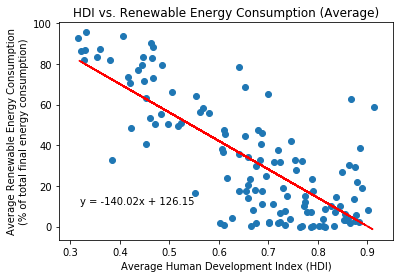

In [117]:
#plt.scatter(merged_df["Avg HDI"], merged_df["Avg Energy Consumption"])
plt.title("HDI vs. Renewable Energy Consumption (Average)")
plt.xlabel("Average Human Development Index (HDI)")
plt.ylabel(r"Average Renewable Energy Consumption" + "\n" + "(% of total final energy consumption)")

x_values = merged_df["Avg HDI"]
y_values = merged_df["Avg Energy Consumption"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r--")
plt.annotate(line_eq, (0.32, 11), fontsize = 10, color = "black")

print(f"Correlation coefficient: {rvalue} \n")

In [123]:
# The cut-off points are: HDI of less than 0.550 for low human development, 
# 0.550–0.699 for medium human development, 
# 0.700–0.799 for high human development 
# and 0.800 or greater for very high human development.
bins=[0,0.549,0.699,0.799,1]
labels=["Low Human Development","Medium Human Development", "High Human Development","Very High Human Development"]
merged_df["Development"]=pd.cut(merged_df["Avg HDI"],bins,labels=labels)

Correlation coefficient: -0.5117710583950983 



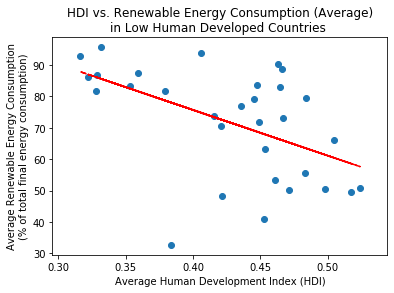

In [124]:
plt.title(r"HDI vs. Renewable Energy Consumption (Average)" + "\n" + "in Low Human Developed Countries ")
plt.xlabel("Average Human Development Index (HDI)")
plt.ylabel(r"Average Renewable Energy Consumption" + "\n" + "(% of total final energy consumption)")
x_values = merged_df["Avg HDI"].loc[merged_df["Development"]=="Low Human Development"]
y_values = merged_df["Avg Energy Consumption"].loc[merged_df["Development"]=="Low Human Development"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r--")
#plt.annotate(line_eq, (0.32, 11), fontsize = 10, color = "black")

print(f"Correlation coefficient: {rvalue} \n")

Correlation coefficient: -0.2212360416429177 



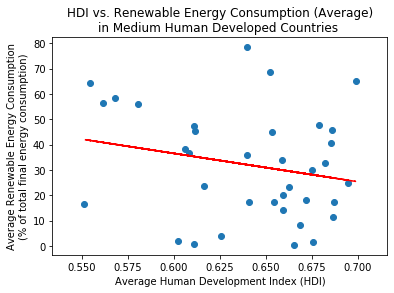

In [125]:
plt.title(r"HDI vs. Renewable Energy Consumption (Average)" + "\n" + "in Medium Human Developed Countries ")
plt.xlabel("Average Human Development Index (HDI)")
plt.ylabel(r"Average Renewable Energy Consumption" + "\n" + "(% of total final energy consumption)")
x_values = merged_df["Avg HDI"].loc[merged_df["HD Group"]=="Medium Human Development"]
y_values = merged_df["Avg Energy Consumption"].loc[merged_df["Development"]=="Medium Human Development"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r--")
#plt.annotate(line_eq, (0.32, 11), fontsize = 10, color = "black")

print(f"Correlation coefficient: {rvalue} \n")

Correlation coefficient: -0.06540311222389178 



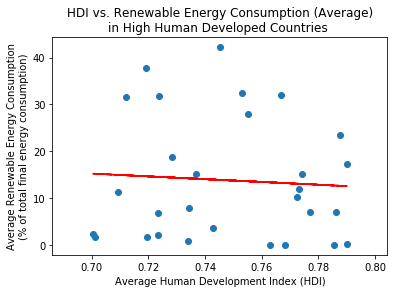

In [131]:
plt.title(r"HDI vs. Renewable Energy Consumption (Average)" + "\n" + "in High Human Developed Countries ")
plt.xlabel("Average Human Development Index (HDI)")
plt.ylabel(r"Average Renewable Energy Consumption" + "\n" + "(% of total final energy consumption)")
x_values = merged_df["Avg HDI"].loc[merged_df["Development"]=="High Human Development"]
y_values = merged_df["Avg Energy Consumption"].loc[merged_df["Development"]=="High Human Development"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r--")
#plt.annotate(line_eq, (0.32, 11), fontsize = 10, color = "black")

print(f"Correlation coefficient: {rvalue} \n")

Correlation coefficient: 0.49842352739145 



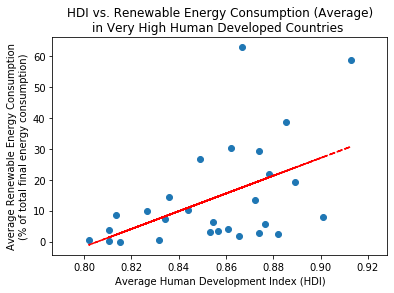

In [128]:
plt.title(r"HDI vs. Renewable Energy Consumption (Average)" + "\n" + "in Very High Human Developed Countries ")
plt.xlabel("Average Human Development Index (HDI)")
plt.ylabel(r"Average Renewable Energy Consumption" + "\n" + "(% of total final energy consumption)")
x_values = merged_df["Avg HDI"].loc[merged_df["Development"]=="Very High Human Development"]
y_values = merged_df["Avg Energy Consumption"].loc[merged_df["Development"]=="Very High Human Development"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r--")
#plt.annotate(line_eq, (0.32, 11), fontsize = 10, color = "black")

print(f"Correlation coefficient: {rvalue} \n")

F_onewayResult(statistic=71.42862710607763, pvalue=1.4237724162476026e-26)

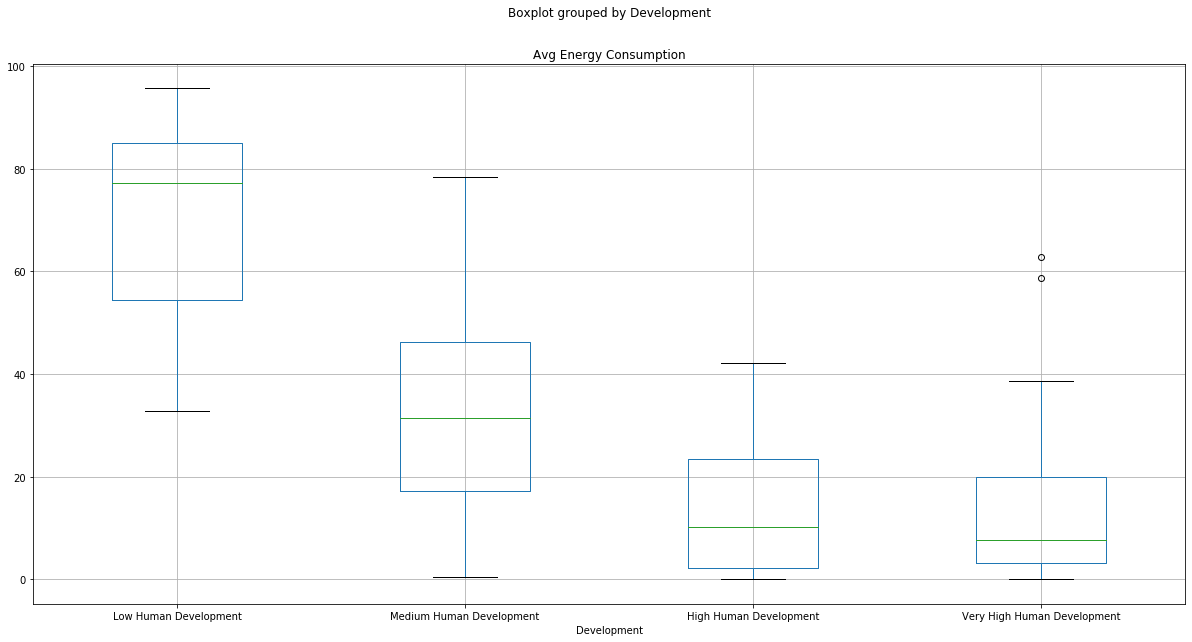

In [130]:
merged_df.boxplot("Avg Energy Consumption", by="Development", figsize = (20,10))
group1 = merged_df.loc[merged_df["Development"]=="Low Human Development"]["Avg Energy Consumption"]
group2 = merged_df.loc[merged_df["Development"]=="Medium Human Development"]["Avg Energy Consumption"]
group3 = merged_df.loc[merged_df["Development"]=="High Human Development"]["Avg Energy Consumption"]
group4 = merged_df.loc[merged_df["Development"]=="Very High Human Development"]["Avg Energy Consumption"]

stats.f_oneway(group1,group2,group3,group4)